# Optimization

In [7]:
import numpy as np

In [8]:
#Relu activation function

class activation_Relu: 
    #forward Pass
    def forward(self,inputs):
        #calculate output values from inputs
        self.output =np.maximum(0,inputs)

In [9]:
class Activation_Softmax:
    #FORWARD PASS
    def forward(self, inputs):
        exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        probability=exp_values/np.sum(exp_values, axis=1,keepdims=True)
        self.output=probability

In [10]:
class Layer_Dense:
    def __init__(self, inputs,neurons):
        self.weights= 0.01*np.random.randn(inputs,neurons)
        self.biases=np.zeros((1,neurons))
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

## Strategy 1 : to randomely select weights and biases 


In [13]:
import nnfs
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)


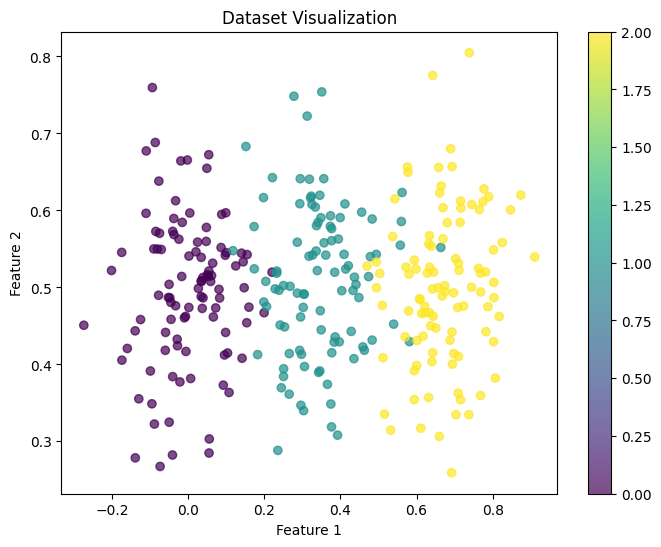


=== Statistical Summary ===
X statistics:
  Mean: [0.33978891 0.50138318]
  Std: [0.28963182 0.09718236]
  Min: [-0.27403422  0.25928634]
  Max: [0.91038328 0.80482734]


In [15]:
import matplotlib.pyplot as plt

# Scatter plot if X has 2 features
if X.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('Dataset Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Print statistical summary
print("\n=== Statistical Summary ===")
print("X statistics:")
print(f"  Mean: {np.mean(X, axis=0)}")
print(f"  Std: {np.std(X, axis=0)}")
print(f"  Min: {np.min(X, axis=0)}")
print(f"  Max: {np.max(X, axis=0)}")

In [17]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [18]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
 # Forward pass
 def forward(self, y_pred, y_true):
  # Number of samples in a batch
  samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values -
  # only if categorical labels
  if len(y_true.shape) == 1:
   correct_confidences = y_pred_clipped[
   range(samples),
   y_true
   ]
  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2:
   correct_confidences = np.sum(
   y_pred_clipped*y_true,
   axis=1
   )
 # Losses
  negative_log_likelihoods = -np.log(correct_confidences)
  return negative_log_likelihoods

In [19]:



dense1=Layer_Dense(2,3)
activation1=activation_Relu()
dense2=Layer_Dense(3,3)
activation2=Activation_Softmax()

loss_function=Loss_CategoricalCrossentropy()

In [21]:
best_dense1 = Layer_Dense(2, 3)
best_dense2 = Layer_Dense(3, 3)
best_dense1.weights = dense1.weights.copy()
best_dense1.biases = dense1.biases.copy()
best_dense2.weights = dense2.weights.copy()
best_dense2.biases = dense2.biases.copy()

lowest_loss=999
best_dense1.weights=dense1.weights.copy()
best_dense1.biases=dense1.biases.copy()
best_dense2.weights=dense2.weights.copy()
best_dense2.biases=dense2.biases.copy()


In [24]:
# Performaing the forward pass of the training 
for i in range(1000):
    dense1.weights=0.5*np.random.randn(2,3)
    dense1.biases=0.5*np.random.randn(1,3)
    dense1.weights=0.5*np.random.randn(2,3)
    dense1.biases=0.5*np.random.randn(1,3)
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    loss=loss_function.calculate(activation2.output,y)

    predictions=np.argmax(activation2.output,axis=1)
    accuracy=np.mean(predictions==y)
    if loss<lowest_loss:
        print(f"new and sets of weights and biases found, iteration :" ,i,"loss", loss , " accuracy", accuracy)
        best_dense1.weights=dense1.weights.copy()
        best_dense1.biases=dense1.biases.copy()
        best_dense2.weights=dense2.weights.copy()
        best_dense2.biases=dense2.biases.copy()
        lowest_loss=loss



new and sets of weights and biases found, iteration : 0 loss 1.0984631233726923  accuracy 0.3333333333333333
new and sets of weights and biases found, iteration : 1 loss 1.0984086642106208  accuracy 0.3333333333333333
new and sets of weights and biases found, iteration : 2 loss 1.0983812746502024  accuracy 0.3333333333333333
new and sets of weights and biases found, iteration : 5 loss 1.0981563994183867  accuracy 0.6333333333333333
new and sets of weights and biases found, iteration : 11 loss 1.0973860095624768  accuracy 0.4
new and sets of weights and biases found, iteration : 13 loss 1.0971319796648284  accuracy 0.44
new and sets of weights and biases found, iteration : 16 loss 1.096864816448158  accuracy 0.3333333333333333
new and sets of weights and biases found, iteration : 292 loss 1.0964920823088247  accuracy 0.6666666666666666
new and sets of weights and biases found, iteration : 317 loss 1.096065761650862  accuracy 0.5933333333333334
